In [43]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pandas.plotting import lag_plot

from datetime import datetime, date, timedelta

In [79]:
def import_process_data_for_eda():
    """
    Imports master
    """
    caiso = pd.read_csv('data/caiso_master.csv')
    caiso.drop('Unnamed: 0', axis=1, inplace=True)
    caiso['INTERVAL_START_PT'] = pd.to_datetime(caiso['INTERVAL_START_PT']).apply(lambda x: x.replace(tzinfo=None))
    caiso['INTERVAL_END_PT'] = pd.to_datetime(caiso['INTERVAL_END_PT']).apply(lambda x: x.replace(tzinfo=None))
    caiso['date_hour_start'] = pd.to_datetime(caiso['date_hour_start']).apply(lambda x: x.replace(tzinfo=None))
    caiso['OPR_DT_PT'] = pd.to_datetime(caiso['OPR_DT_PT'])
    caiso.set_index('INTERVAL_START_PT', inplace=True)
    caiso.rename({'HH_$_million_BTU_not_seasonal_adj': 'HH_$_mill_BTU', 'total_mw':'total_gen'},axis=1, inplace=True)
    caiso['HH_$_mill_BTU'] = pd.to_numeric(caiso['HH_$_mill_BTU'])
    apr_30_20 = caiso[caiso['OPR_DT_PT'] == '2020-04-30']
    end_may20_hrly = pd.concat([apr_30_20, apr_30_20, apr_30_20, apr_30_20], axis=0)
    beg_may_arr = pd.date_range(start='2020-05-01', end='2020-05-05', freq='H')[:-1]
    end_may20_hrly.set_index(beg_may_arr, inplace=True)
    caiso_eda = pd.concat([caiso, end_may20_hrly], axis=0)
    caiso_eda.sort_index()
    caiso_eda['total_re'] = caiso_eda['solar'] + caiso_eda['wind']
#     caiso_eda['prcnt_re_gen'] = caiso_eda['total_re'] / caiso_eda['total_gen']
    caiso_eda = caiso_eda[caiso_eda['OPR_DT_PT'] != '2020-05-05']
    return caiso_eda

In [80]:
date_arr = caiso_eda.index
np15_lmp = caiso_eda['$_MWH_np15']
sp15_lmp = caiso_eda['$_MWH_sp15']
zp26_lmp = caiso_eda['$_MWH_zp26']
all_lmp = [np15_lmp, sp15_lmp, zp26_lmp]

In [81]:
caiso_eda = import_process_data_for_eda()

## Day Ahead Hourly Prices

High average day-ahead priceswere frequent in the first quarter with prices greater than 100/MWh occurring around 8 percent of
intervals compared with around 1.3 percent in the same quarter of 2018. Average day-ahead prices
greater than 100/MWh in just the month of February occurred in around 22.5 percent of intervals,
largely driven by high natural gas prices at trade hubs located within the ISO area. 


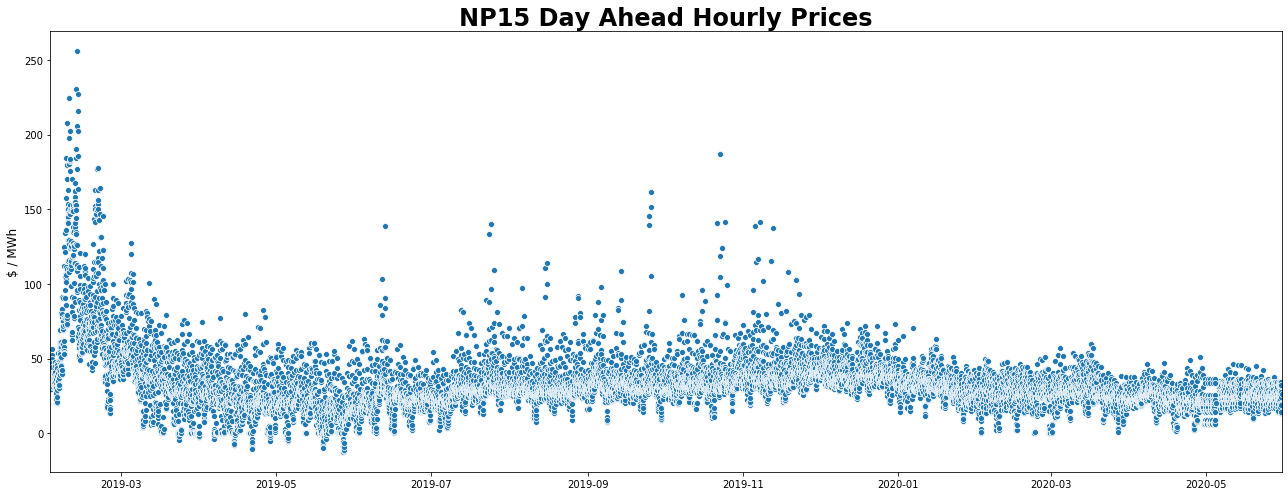

In [70]:
plt.figure(figsize=(18,7))
ax = sns.scatterplot(x=date_arr, y=np15_lmp)
ax.set_xlim(date_arr.min(),date_arr.max())
ax.set_ylabel('$ / MWh', fontsize=12)
ax.set_title('NP15 Day Ahead Hourly Prices', fontsize=24, fontweight='bold')
plt.tight_layout();

plt.savefig('images/np15_day_ahead_price.png')

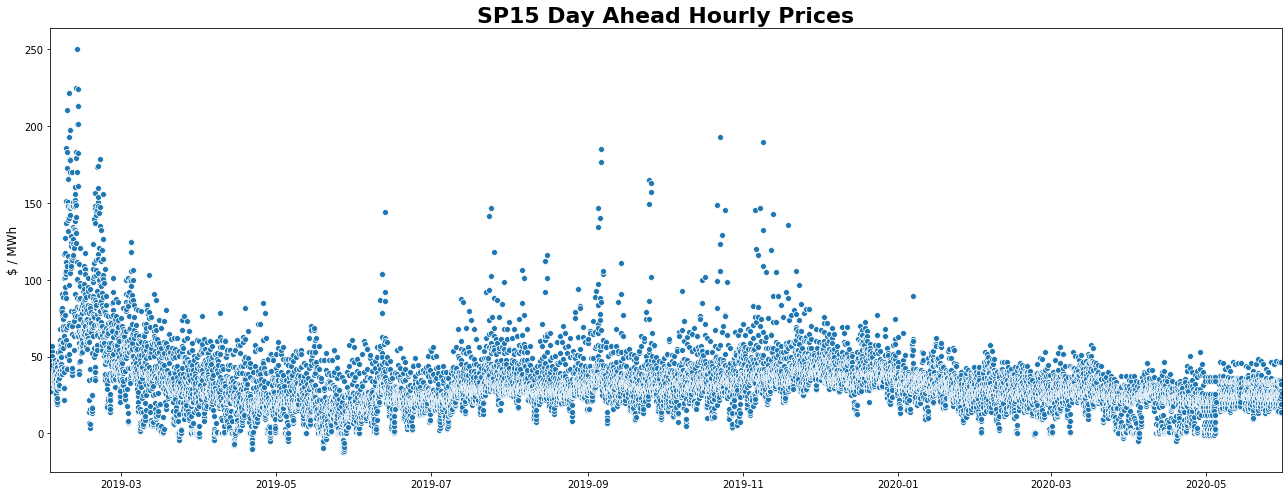

In [22]:
plt.figure(figsize=(18,7))
ax = sns.scatterplot(x=date_arr, y=sp15_lmp)
ax.set_xlim(date_arr.min(),date_arr.max())
ax.set_ylabel('$ / MWh', fontsize=12)
ax.set_title('SP15 Day Ahead Hourly Prices', fontsize=22, fontweight='bold')
plt.tight_layout();

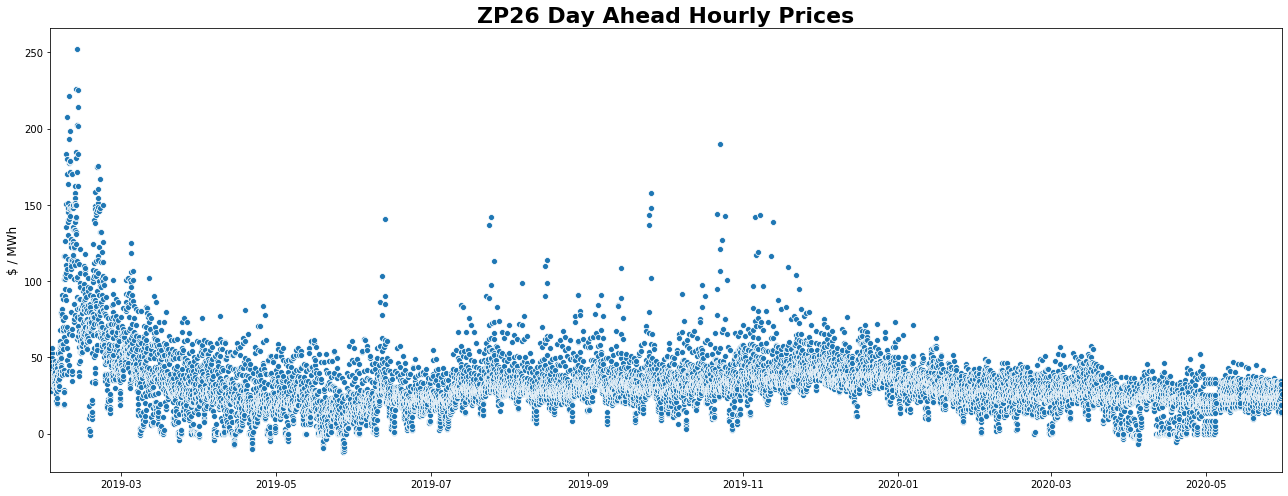

In [24]:
plt.figure(figsize=(18,7))
ax = sns.scatterplot(x=date_arr, y=zp26_lmp)
ax.set_xlim(date_arr.min(),date_arr.max())
ax.set_ylabel('$ / MWh', fontsize=12)
ax.set_title('ZP26 Day Ahead Hourly Prices', fontsize=22, fontweight='bold')
plt.tight_layout();

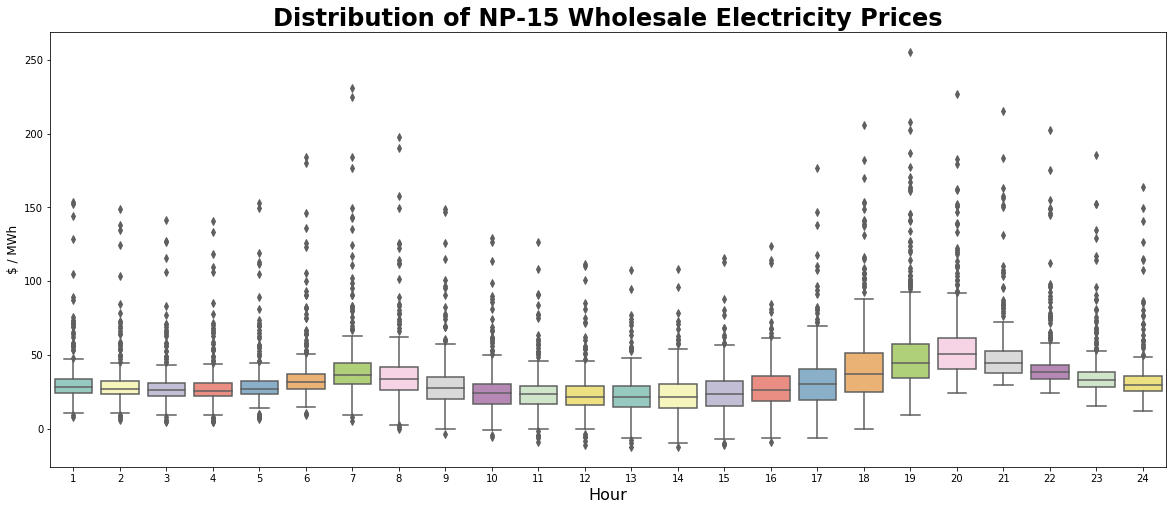

In [93]:
plt.figure(figsize=(20,8))
ax = sns.boxplot(x='OPR_HR_PT', y='$_MWH_np15', palette='Set3', data=caiso_eda)
ax.set_title('Distribution of NP-15 Wholesale Electricity Prices', fontsize=24, fontweight='bold')
ax.set_ylabel('$ / MWh', fontsize=12)
ax.set_xlabel('Hour', fontsize=16)
ax.set_xlim(-0.5, 23.5)

plt.savefig('images/np15_hourly_distribution.png')

## Time Series Lag Scatter Plots

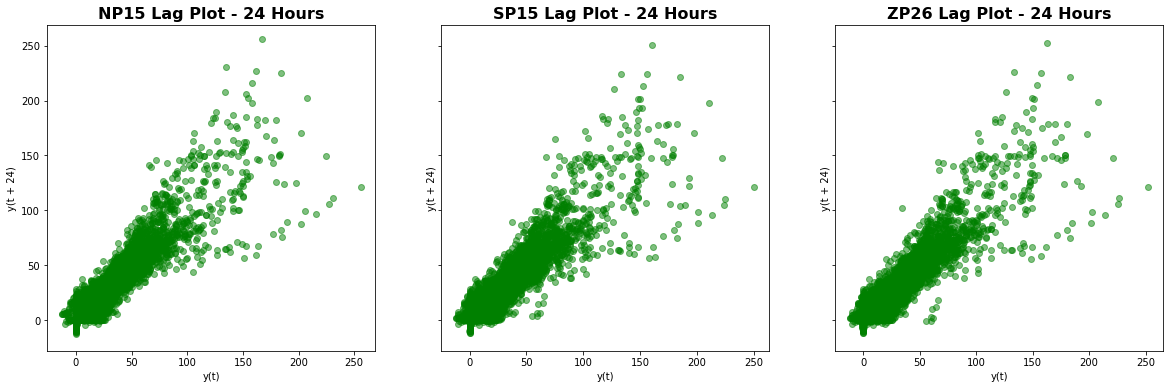

In [102]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20,6))
hubs =  ['NP15', 'SP15', 'ZP26']


for i, curve, h in zip(range(len(hubs)), all_lmp, hubs):
    lag_plot(curve, ax=axs[i], c='green', alpha=0.5, lag=24)
    axs[i].set_title(f"{h} Lag Plot - 24 Hours", fontsize=16, fontweight='bold')
    
# plt.savefig('images/lag_plot.png')

In [82]:
caiso_daily = caiso_eda.groupby('OPR_DT_PT').agg(func='sum').reset_index()
# caiso_daily.drop('prcnt_re_gen', axis=1, inplace=True) 
caiso_daily['prcnt_re_gen'] = (caiso_daily['solar'] + caiso_daily['wind']) / caiso_daily['total_gen']

In [ ]:
def fit_moving_average_trend(series, window=6):
#    return pd.rolling_mean(series, window, center=True)
    return series.rolling(window, center=True).mean()

def plot_moving_average_trend(ax, name, series, window=6):
       moving_avg = seris.rolling(window, center=True).mean()

    plot_trend_data(ax, name, series)
    ax.plot(series.index.date, moving_average_trend)

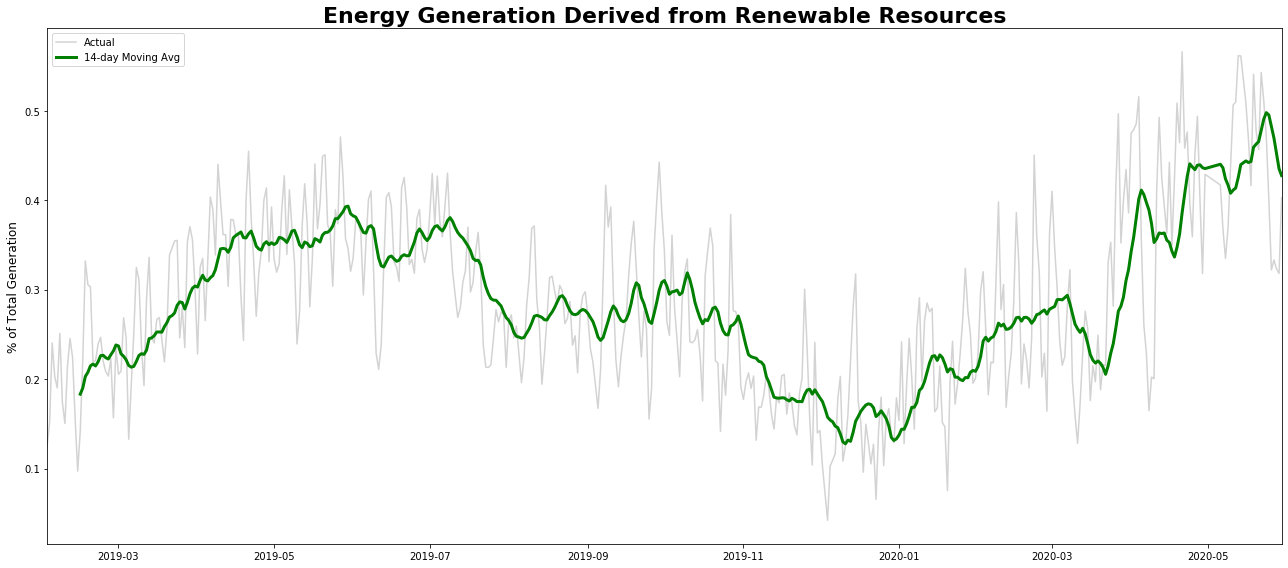

In [106]:
fig, ax = plt.subplots(figsize=(18,8))
# plt.rcParams['font.family'] = 'garamond'
rolling7= caiso_daily['prcnt_re_gen'].rolling(7).mean()
rolling14 = caiso_daily['prcnt_re_gen'].rolling(14).mean()
daily_date_arr = caiso_daily['OPR_DT_PT']

ax.plot(daily_date_arr, caiso_daily['prcnt_re_gen'], color='lightgrey', label='Actual')
ax.plot(daily_date_arr, rolling14, color='green', linewidth=3, label='14-day Moving Avg')
ax.set_ylabel('% of Total Generation', fontsize=12)
ax.set_title('Energy Generation Derived from Renewable Resources', fontsize=22, fontweight='bold')
ax.set_xlim(daily_date_arr.min(), daily_date_arr.max())
ax.legend()
plt.tight_layout();

# plt.savefig('images/energy_derived_renew.png')

In [89]:
daily_date_arr

RangeIndex(start=0, stop=479, step=1)